In [1]:
from scipy.special import ndtri
from scipy.stats import normaltest
import numpy as np
from RNG import MyRandom
random = MyRandom(6421893, m=1000)

import seaborn as sns

# Generating stochastic variables from a distribution of choice
The method used in this ipynb is called inverse transform sampling. The problem solved by this method is defined as such (sourced from ["Wikipedia"](https://en.wikipedia.org/wiki/Inverse_transform_sampling))  
* Let $X$ be a random variable whose distribution can be described by the cumulative distribution function $F_X$
* We want to generate values of $X$  which are distributed according to this distribution  

The method is then:
1. Generate a random number $u$ from the standard uniform distribution in the interval $[0,1]$
2. Find the inverse of the desired CDF, for example $F^{-1}_{X}(x)$
3. Compute $X = F^{-1}_{X}(u)$. The computed random variabel $X$ has distribution $F_{X}(x)$  

So, the first step is to generate 10,000 pseudo-random variables in $[0,1]$

In [2]:
r_nums = [random.randfloat() for _ in range(10000)]
r_nums[:10]

[0.007007007007007007,
 0.012012012012012012,
 0.011011011011011011,
 0.004004004004004004,
 0.015015015015015015,
 0.021021021021021023,
 0.014014014014014014,
 0.011011011011011011,
 0.02702702702702703,
 0.03203203203203203]

The next step is to find the inverse CDF of the desired distribution. The distribution of choice is the normal distribution (bell curve). The chosen technique to convert `rnums` to stochastic variables is called `ndtri`, it is sourced from scipy.

In [3]:
bell_nums = ndtri(r_nums)
bell_nums[:10]

array([-2.45690397, -2.25674483, -2.28998783, -2.65173198, -2.16969406,
       -2.03310375, -2.19689385, -2.28998783, -1.92640315, -1.85173376])

Values of `0` and `1` are represented as `-inf` and `inf` by ndtri. In order to plot `bell_nums`, the `-inf` and `inf` values need to be handled. The values `-inf` and `inf` will be replaced by -2 and 2, respectively.

In [4]:
plot_nums = bell_nums.copy()
plot_nums[plot_nums == -np.Inf] = -2
plot_nums[plot_nums == np.Inf] = 2

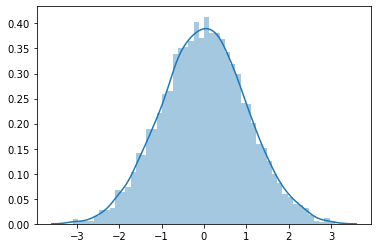

In [5]:
sns.distplot(plot_nums)

Now this certainly looks normally distributed, but how do we know? In order to properly test this, one can use [D'Agostino and Pearson's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) implemented in SciPy. It combines the "skewtest" (D'Agostino) and the "Kurtosis" (Anscombe, Glynn) test to produce "an omnibus test of normality".  

The `normaltest` function returns two things:
* `ks2`, $s^{2} + k^{2}$, where $s$ is the z-score returned by the skewtest, and $k$ is the z-score returned by the kurtosistest.
* `p`, a 2-sided chi squared probability for the hypothesis test.  

The hypotheses:

* Null hypothesis: `plot_nums` is generated from a normal distribution
* Alternative hypothesis: `plot_nums` was not generated from a normal distribution

If $p \lt a $, reject the null hypothesis and accept the alternative.  The alpha is taken from the SciPy example for [`normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).   
$a = 1e^{-3}$

In [6]:
ks2, p = normaltest(plot_nums)
a = 1e-3
ks2, p

(8.90961781535816, 0.011622540640704532)

In [7]:
print("The null hypothesis may", "" if p < a else "not", "be rejected")

The null hypothesis may not be rejected
